In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#ALI MUSTAFA I18_0619

# =======Sorting Data=======

## Reading in Panda 

### (Messidor for Clustering and Mammography for k-NN Classification)

In [2]:
messidor = pd.read_csv('messidor_features.data',sep=",")#names = arrTitle)
messidor

,1,1.1,22,22.1,22.2,19,18,14,49.895756,17.775994,5.27092,0.771761,0.018632,0.006864,0.003923,0.003923.1,0.486903,0.100025,1.2,0
0,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
1,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
2,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
3,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
4,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1146,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1147,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1148,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [3]:
messidor_data = messidor[['5.27092','0.771761','0.018632','0.006864','0.003923','0.003923.1','0.486903','0.100025','1.2','0']]

messidor_data

,5.27092,0.771761,0.018632,0.006864,0.003923,0.003923.1,0.486903,0.100025,1.2,0
0,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
1,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
2,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
3,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
4,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
...,...,...,...,...,...,...,...,...,...,...
1145,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1146,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1147,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1148,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [4]:
mammographic_titles = ['BI-RADS assessment','Age','Shape','Margin','Density','Severity']
mammographic_data = pd.read_csv('mammographic_masses.data',sep=",",names = mammographic_titles)

mammographic_data

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


### Convert Data into Float/Fill Empty and pick only 6 columns (MA detection results)

In [5]:
messidor_data = messidor_data.rename(columns={'5.27092' : 'MA1','0.771761': 'MA2','0.018632': 'MA3','0.006864': 'MA4','0.003923': 'MA5', \
                                              '0.003923.1': 'MA6','0.486903': 'EU_Dist','0.100025' : 'Diameter','1.2' : 'AM/FM','0' : 'cLabel'})

# water_data['Q-E'] = pd.to_numeric(water_data['Q-E'], errors='coerce')
# water_data['Q-E'] = water_data['Q-E'].fillna(water_data['DBO-E'].mean())

# water_data['ZN-E'] = pd.to_numeric(water_data['ZN-E'], errors='coerce')
# water_data['ZN-E'] = water_data['ZN-E'].fillna(water_data['DBO-E'].mean())

# water_data['PH-E'] = pd.to_numeric(water_data['PH-E'], errors='coerce')
# water_data['PH-E'] = water_data['PH-E'].fillna(water_data['DBO-E'].mean())

# water_data['DBO-E'] = pd.to_numeric(water_data['DBO-E'], errors='coerce')
# water_data['DBO-E'] = water_data['DBO-E'].fillna(water_data['DBO-E'].mean())

# water_data['DQO-E'] = pd.to_numeric(water_data['DQO-E'], errors='coerce')
# water_data['DQO-E'] = water_data['DQO-E'].fillna(water_data['DBO-E'].mean())

# water_data['SS-E'] = pd.to_numeric(water_data['SS-E'], errors='coerce')
# water_data['SS-E'] = water_data['SS-E'].fillna(water_data['DBO-E'].mean())

print(messidor_data)

            MA1       MA2       MA3       MA4       MA5       MA6   EU_Dist  \
0      3.325423  0.234185  0.003903  0.003903  0.003903  0.003903  0.520908   
1     12.687485  4.852282  1.393889  0.373252  0.041817  0.007744  0.530904   
2      9.118901  3.079428  0.840261  0.272434  0.007653  0.001531  0.483284   
3      0.410381  0.000000  0.000000  0.000000  0.000000  0.000000  0.475935   
4      2.305771  0.323724  0.000000  0.000000  0.000000  0.000000  0.502831   
...         ...       ...       ...       ...       ...       ...       ...   
1145   0.031145  0.003115  0.000000  0.000000  0.000000  0.000000  0.537470   
1146   8.067688  0.979548  0.001552  0.000000  0.000000  0.000000  0.516733   
1147   1.763305  0.137858  0.011221  0.000000  0.000000  0.000000  0.560632   
1148   4.740919  1.077570  0.563518  0.326860  0.239568  0.174584  0.485972   
1149   1.750548  0.046597  0.021180  0.008472  0.000000  0.000000  0.556192   

      Diameter  AM/FM  cLabel  
0     0.144414     

In [6]:
messidor_data['MA1'] = pd.to_numeric(messidor_data['MA1'], errors='coerce')
messidor_data['MA1'] = messidor_data['MA1'].fillna(messidor_data['MA1'].mean())

In [7]:
panda_titles = ['MA1' ,'MA2',  'MA3',  'MA4',  'MA5',  'MA6',   'EU_Dist',  'Diameter',  'AM/FM',  'cLabel']

for i in range(len(panda_titles)):    
    messidor_data[panda_titles[i]] = pd.to_numeric(messidor_data[panda_titles[i]], errors='coerce')
    messidor_data[panda_titles[i]] = messidor_data[panda_titles[i]].fillna(messidor_data[panda_titles[i]].mean())

print(messidor_data)

            MA1       MA2       MA3       MA4       MA5       MA6   EU_Dist  \
0      3.325423  0.234185  0.003903  0.003903  0.003903  0.003903  0.520908   
1     12.687485  4.852282  1.393889  0.373252  0.041817  0.007744  0.530904   
2      9.118901  3.079428  0.840261  0.272434  0.007653  0.001531  0.483284   
3      0.410381  0.000000  0.000000  0.000000  0.000000  0.000000  0.475935   
4      2.305771  0.323724  0.000000  0.000000  0.000000  0.000000  0.502831   
...         ...       ...       ...       ...       ...       ...       ...   
1145   0.031145  0.003115  0.000000  0.000000  0.000000  0.000000  0.537470   
1146   8.067688  0.979548  0.001552  0.000000  0.000000  0.000000  0.516733   
1147   1.763305  0.137858  0.011221  0.000000  0.000000  0.000000  0.560632   
1148   4.740919  1.077570  0.563518  0.326860  0.239568  0.174584  0.485972   
1149   1.750548  0.046597  0.021180  0.008472  0.000000  0.000000  0.556192   

      Diameter  AM/FM  cLabel  
0     0.144414     

In [8]:
for i in range(len(mammographic_titles)):  
    if i == 2:
        mammographic_data[mammographic_titles[i]] = pd.to_numeric(mammographic_data[mammographic_titles[i]], errors='coerce')
        mammographic_data[mammographic_titles[i]] = mammographic_data[mammographic_titles[i]].fillna(3)
        continue
    mammographic_data[mammographic_titles[i]] = pd.to_numeric(mammographic_data[mammographic_titles[i]], errors='coerce')
    mammographic_data[mammographic_titles[i]] = mammographic_data[mammographic_titles[i]].fillna(mammographic_data[mammographic_titles[i]].mean())


print(mammographic_data.iloc[6])


BI-RADS assessment     4.000000
Age                   70.000000
Shape                  3.000000
Margin                 2.796276
Density                3.000000
Severity               0.000000
Name: 6, dtype: float64


In [9]:
mammographic_secondary_data = mammographic_data[['Shape']]
mammographic_data = mammographic_data[['BI-RADS assessment','Age','Margin','Density','Severity']]
mammographic_data

,BI-RADS assessment,Age,Margin,Density,Severity
0,5.0,67.0,5.0,3.000000,1
1,4.0,43.0,1.0,2.910734,1
2,5.0,58.0,5.0,3.000000,1
3,4.0,28.0,1.0,3.000000,0
4,5.0,74.0,5.0,2.910734,1
...,...,...,...,...,...
956,4.0,47.0,1.0,3.000000,0
957,4.0,56.0,5.0,3.000000,1
958,4.0,64.0,5.0,3.000000,0
959,5.0,66.0,5.0,3.000000,1


## -----Normalize Data-----

### Convert to numpy and normalize from 0-1 

In [10]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_val = [row[i] for row in dataset]
        vmin = min(col_val)
        vmax = max(col_val)
        minmax.append([vmin, vmax])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax,mammographic_bool = False):
    for row in dataset:
        for i in range(len(row)):
            if mammographic_bool == True and i == 2:
                continue
            else:
                row[i] = (row[i] - minmax[i][0])
                row[i] = row[i] / (minmax[i][1] - minmax[i][0])

In [11]:
# Calculate min and max for each column
messidor1_np = messidor_data.to_numpy()
minmax = dataset_minmax(messidor1_np)
# Normalize columns
normalize_dataset(messidor1_np, minmax)
print(messidor1_np)

messidor_data = pd.DataFrame(messidor1_np, columns=panda_titles)

[[3.13511843e-02 3.91835702e-03 7.58995821e-05 ... 5.36340697e-01
  0.00000000e+00 0.00000000e+00]
 [1.19614160e-01 8.11878355e-02 2.71062241e-02 ... 4.37973130e-01
  0.00000000e+00 1.00000000e+00]
 [8.59705203e-02 5.15246422e-02 1.63401124e-02 ... 3.52674946e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [1.66239603e-02 2.30662452e-03 2.18208868e-04 ... 4.46001996e-01
  0.00000000e+00 0.00000000e+00]
 [4.46960959e-02 1.80297798e-02 1.09584373e-02 ... 3.02455779e-01
  1.00000000e+00 1.00000000e+00]
 [1.65036908e-02 7.79655752e-04 4.11876287e-04 ... 1.92513004e-01
  0.00000000e+00 0.00000000e+00]]


In [12]:
print(messidor_data)

           MA1       MA2       MA3       MA4       MA5       MA6   EU_Dist  \
0     0.031351  0.003918  0.000076  0.000194  0.000657  0.001264  0.682302   
1     0.119614  0.081188  0.027106  0.018571  0.007043  0.002509  0.726836   
2     0.085971  0.051525  0.016340  0.013555  0.001289  0.000496  0.514678   
3     0.003869  0.000000  0.000000  0.000000  0.000000  0.000000  0.481936   
4     0.021738  0.005417  0.000000  0.000000  0.000000  0.000000  0.601764   
...        ...       ...       ...       ...       ...       ...       ...   
1145  0.000294  0.000052  0.000000  0.000000  0.000000  0.000000  0.756089   
1146  0.076060  0.016390  0.000030  0.000000  0.000000  0.000000  0.663701   
1147  0.016624  0.002307  0.000218  0.000000  0.000000  0.000000  0.859281   
1148  0.044696  0.018030  0.010958  0.016263  0.040346  0.056559  0.526653   
1149  0.016504  0.000780  0.000412  0.000422  0.000000  0.000000  0.839500   

      Diameter  AM/FM  cLabel  
0     0.536341    0.0     0.0  

In [13]:
mammographic_data

# Calculate min and max for each column
mammographic_np = mammographic_data.to_numpy()
minmax = dataset_minmax(mammographic_np)
# Normalize columns
normalize_dataset(mammographic_np, minmax,True)
print(mammographic_np)

mammographic_data = pd.DataFrame(mammographic_np, columns=['BI-RADS assessment','Age','Margin','Density','Severity'])

[[0.09090909 0.62820513 5.         0.66666667 1.        ]
 [0.07272727 0.32051282 1.         0.63691149 1.        ]
 [0.09090909 0.51282051 5.         0.66666667 1.        ]
 ...
 [0.07272727 0.58974359 5.         0.66666667 0.        ]
 [0.09090909 0.61538462 5.         0.66666667 1.        ]
 [0.07272727 0.56410256 3.         0.66666667 0.        ]]


In [14]:
print(mammographic_data)

     BI-RADS assessment       Age  Margin   Density  Severity
0              0.090909  0.628205     5.0  0.666667       1.0
1              0.072727  0.320513     1.0  0.636911       1.0
2              0.090909  0.512821     5.0  0.666667       1.0
3              0.072727  0.128205     1.0  0.666667       0.0
4              0.090909  0.717949     5.0  0.636911       1.0
..                  ...       ...     ...       ...       ...
956            0.072727  0.371795     1.0  0.666667       0.0
957            0.072727  0.487179     5.0  0.666667       1.0
958            0.072727  0.589744     5.0  0.666667       0.0
959            0.090909  0.615385     5.0  0.666667       1.0
960            0.072727  0.564103     3.0  0.666667       0.0

[961 rows x 5 columns]


### Adding Shape Class.

In [15]:
mammographic_data = mammographic_data.join(mammographic_secondary_data)
mammographic_data

,BI-RADS assessment,Age,Margin,Density,Severity,Shape
0,0.090909,0.628205,5.0,0.666667,1.0,3.0
1,0.072727,0.320513,1.0,0.636911,1.0,1.0
2,0.090909,0.512821,5.0,0.666667,1.0,4.0
3,0.072727,0.128205,1.0,0.666667,0.0,1.0
4,0.090909,0.717949,5.0,0.636911,1.0,1.0
...,...,...,...,...,...,...
956,0.072727,0.371795,1.0,0.666667,0.0,2.0
957,0.072727,0.487179,5.0,0.666667,1.0,4.0
958,0.072727,0.589744,5.0,0.666667,0.0,4.0
959,0.090909,0.615385,5.0,0.666667,1.0,4.0


## -----Quartile Method-----

### Removing Outliers via InterQuartile method

In [16]:
Q1 = messidor_data.quantile(0.25)
Q3 = messidor_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MA1         0.099304
MA2         0.030861
MA3         0.003741
MA4         0.001916
MA5         0.000814
MA6         0.001247
EU_Dist     0.181749
Diameter    0.147843
AM/FM       1.000000
cLabel      1.000000
dtype: float64


In [17]:
messidor_data_out = messidor_data[~((messidor_data < (Q1 - 1.5 * IQR)) |(messidor_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
print(messidor_data_out)

           MA1       MA2       MA3       MA4       MA5       MA6   EU_Dist  \
0     0.031351  0.003918  0.000076  0.000194  0.000657  0.001264  0.682302   
3     0.003869  0.000000  0.000000  0.000000  0.000000  0.000000  0.481936   
4     0.021738  0.005417  0.000000  0.000000  0.000000  0.000000  0.601764   
5     0.015400  0.000000  0.000000  0.000000  0.000000  0.000000  0.775126   
6     0.011536  0.002516  0.000000  0.000000  0.000000  0.000000  0.929166   
...        ...       ...       ...       ...       ...       ...       ...   
1143  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.756450   
1145  0.000294  0.000052  0.000000  0.000000  0.000000  0.000000  0.756089   
1146  0.076060  0.016390  0.000030  0.000000  0.000000  0.000000  0.663701   
1147  0.016624  0.002307  0.000218  0.000000  0.000000  0.000000  0.859281   
1149  0.016504  0.000780  0.000412  0.000422  0.000000  0.000000  0.839500   

      Diameter  AM/FM  cLabel  
0     0.536341    0.0     0.0  

In [19]:
MQ1 = mammographic_data.quantile(0.25)
MQ3 = mammographic_data.quantile(0.75)
MIQR = MQ3 - MQ1
print(MIQR)

BI-RADS assessment    0.018182
Age                   0.269231
Margin                3.000000
Density               0.000000
Severity              1.000000
Shape                 2.000000
dtype: float64


In [20]:
mammographic_data_out = mammographic_data[~((mammographic_data < (MQ1 - 1.5 * MIQR)) |(mammographic_data > (MQ3 + 1.5 * MIQR))).any(axis=1)]

In [21]:
print(mammographic_data_out)

     BI-RADS assessment       Age    Margin   Density  Severity  Shape
0              0.090909  0.628205  5.000000  0.666667       1.0    3.0
2              0.090909  0.512821  5.000000  0.666667       1.0    4.0
3              0.072727  0.128205  1.000000  0.666667       0.0    1.0
5              0.072727  0.602564  2.796276  0.666667       0.0    1.0
6              0.072727  0.666667  2.796276  0.666667       0.0    3.0
..                  ...       ...       ...       ...       ...    ...
956            0.072727  0.371795  1.000000  0.666667       0.0    2.0
957            0.072727  0.487179  5.000000  0.666667       1.0    4.0
958            0.072727  0.589744  5.000000  0.666667       0.0    4.0
959            0.090909  0.615385  5.000000  0.666667       1.0    4.0
960            0.072727  0.564103  3.000000  0.666667       0.0    3.0

[786 rows x 6 columns]


## Divide into training and test sets

In [22]:
training_length = int(len(mammographic_data_out)*0.7)
test_length = len(mammographic_data_out) - training_length

print(training_length," ",test_length)

550   236


# =======kNN Classification=======

### Training_length = all the indexes inside training_length and same for test_length 

In [23]:
import math
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_knn_point(data,training_length,test_index,knn_value):
    minval = []
    picked_index = []
    for i in range(knn_value):
        minval.append(999999)
        picked_index.append(0)
    
    #MAKE IT GENERIC 
    
    for i in range(training_length):
            euc_dist = 0
            euc_dist = math.sqrt( (pow(data[test_index][0]-(data[i][0]),2) ) + (pow(data[test_index][1]-(data[i][1]),2) ) \
                                + (pow(data[test_index][2] - (data[i][2]),2) ) + (pow(data[test_index][3]-(data[i][3]),2) ) ) \
                                #+ (pow(data[test_index][4]-(data[i][4]),2) ) )
            #LAST 2 COLUMNS NOT PICKED AS THEY ARE CLASSES
            
            replace_check = False
            for k in range(knn_value): 
                if replace_check == True:
                    if euc_dist < minval[k]:
                        
                        temp1 = picked_index[k-1]
                        picked_index[k-1] = picked_index[k]
                        picked_index[k] = temp1
                        
                        temp = minval[k-1]
                        minval[k-1] = minval[k]
                        minval[k] = temp
                    
                if euc_dist < minval[k] and replace_check == False:
                    picked_index[k] = i
                    minval[k] = euc_dist
                    replace_check = True
                
    
    return picked_index

In [24]:
def find_test_class(data,training_length,test_length,knn_value):
    test_classes = []
    
    for i in range(test_length):
        index = training_length + i
        picked_index = find_closest_knn_point(data,index-1,index,knn_value)
        clabel0 = 0
        clabel1 = 0
        clabel2 = 0
        clabel3 = 0
#         print("index =  [",index,"] ",picked_index)
        for j in range(knn_value):
            if data[ picked_index[j] ] [5] == 1:
                clabel0 += 1
            elif data[ picked_index[j] ] [5] == 2:
                clabel1 += 1
            elif data[ picked_index[j] ] [5] == 3:
                clabel2 += 1
            elif data[ picked_index[j] ] [5] == 4:
                clabel3 += 1
        if clabel0 > clabel1 and clabel0 > clabel2 and clabel0 > clabel3:
            test_classes.append(1.0)
        elif clabel1 > clabel0 and clabel1 > clabel2 and clabel1 > clabel3:
            test_classes.append(2.0)
        elif clabel2 > clabel0 and clabel2 > clabel1 and clabel2 > clabel3:
            test_classes.append(3.0)
        elif clabel3 > clabel0 and clabel3 > clabel2 and clabel3 > clabel1:
            test_classes.append(4.0)
        else:                              #ELSE PICK CLOSEST VALUES CLASS
            test_classes.append(data[ picked_index[0] ][5])
        
    
    return test_classes

## -------kNN INPUT HERE-------

In [25]:
mammographic_np = mammographic_data_out.to_numpy()

knn = input("Input K Value : ")
knn = int(knn)

test_knn = find_test_class(mammographic_np,training_length,test_length,knn)

print("\nkNN Test Values\n",test_knn)

test_actual = []

for i in range(test_length):
    test_actual.append(mammographic_np[training_length+i][5])
    
print()
print("\nActual Test Values\n",test_actual)

Input K Value : 5

kNN Test Values
 [4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 4.0, 2.0, 4.0, 4.0, 1.0, 1.0, 4.0, 2.0, 4.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 2.0, 1.0, 2.0, 1.0, 4.0, 2.0, 1.0, 2.0, 1.0, 1.0, 4.0, 3.0, 1.0, 4.0, 1.0, 2.0, 1.0, 1.0, 3.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 1.0, 2.0, 2.0, 4.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 3.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 3.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 1.0, 1.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0, 4.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0, 2.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0, 1.0, 4.0, 1.0, 4.0, 4.0, 4.0, 1.0, 1.0, 3.0, 2.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 1.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 2.0

## Compare Actual v.s kNN 

In [26]:
accurate = 0

for i in range(test_length):
    if test_actual[i] == test_knn[i]:
        accurate += 1

print("Accuracy = ",accurate/test_length)

Accuracy =  0.614406779661017


## Evaluation Metrics

In [27]:
def calculating_Metrics(confusion_Matrix,classindex):
    nb_precision = float((confusion_Matrix[classindex][classindex])/ \
                         (confusion_Matrix[classindex][0]+confusion_Matrix[classindex][1] + confusion_Matrix[classindex][2]+confusion_Matrix[classindex][3]))
    
    nb_recall = float((confusion_Matrix[classindex][classindex])/ \
                      (confusion_Matrix[0][classindex]+confusion_Matrix[1][classindex] + confusion_Matrix[2][classindex]+confusion_Matrix[3][classindex]))

    nb_f1 = 2*((nb_precision*nb_recall)/(nb_precision+nb_recall))

#     nb_precision = "{:.2f}".format(nb_precision*100)
#     nb_recall = "{:.2f}".format(nb_recall*100)
#     nb_f1 = "{:.2f}".format(nb_f1*100)


    print("\nPrecision is : ","{:.2f}".format(nb_precision*100))

    print("Recall is : ","{:.2f}".format(nb_recall*100))
    print("F1 is : ","{:.2f}".format(nb_f1*100))
    
    return nb_precision,nb_recall,nb_f1

In [28]:
folders = ['0','1']
total = test_length
correct = 0
#THIS ONE IS FOR EXACTLY 4 CLASSES AND CLASSES value STARTING FROM 1 till 4

confusion_Matrix = [ [0,0,0,0] , [0,0,0,0] , [0,0,0,0] , [0,0,0,0] ]  

print("\n                  Actual\n               1   2   3   4")
value = 1
for i in confusion_Matrix:
    if value == 2:
        print("Predicted ",value,"",i)
    else:
        print("          ",value,"",i)
    value+=1

print()
      # FAKE  Real
# FAKE              
# Real
for i in range(test_length):
        result = test_knn[i]
        actual = test_actual[i]
        result = int(result) - 1 
        actual = int(actual) - 1
        
        if result == actual:
            correct+=1
        confusion_Matrix[result][actual] += 1
        """""
        if actual == 0.0:
            if result == actual:
                confusion_Matrix[result][actual] += 1
            else:
                confusion_Matrix[1][0] += 1
                
        elif result == 1.0:
            if result == actual:
                confusion_Matrix[1][1] += 1
            else:
                confusion_Matrix[0][1] += 1
        """""

print("==========Evaluation Matrice==========")
print("Total Test Set Length : ",total)
print("Correct Guesses : ",correct)
print("\n                  Actual\n               1   2   3   4")
value = 1
for i in confusion_Matrix:
    if value == 2:
        print("Predicted ",value,"",i)
    else:
        print("          ",value,"",i)
    value+=1
print()
# print("\nTrue Positive : ",confusion_Matrix[1][1])
# print("False Positive : ",confusion_Matrix[0][1])
# print("True Negative : ",confusion_Matrix[0][0])
# print("False Negative : ",confusion_Matrix[1][0])
classindex = 0

nb_accuracy = float(correct/total)
nb_accuracy = "{:.2f}".format(nb_accuracy*100)

precision = 0
recall = 0
f1 = 0

print("Overall Accuracy is : ",nb_accuracy)

print("\n------Class 1------\n")
one,two,three = calculating_Metrics(confusion_Matrix,0)

precision += one
recall += two
f1 += three

print("\n------Class 2------\n")
one,two,three = calculating_Metrics(confusion_Matrix,1)
precision += one
recall += two
f1 += three

print("\n------Class 3------\n")
one,two,three = calculating_Metrics(confusion_Matrix,2)
precision += one
recall += two
f1 += three

print("\n------Class 4------\n")
one,two,three = calculating_Metrics(confusion_Matrix,3)
precision += one
recall += two
f1 += three


print("\n----------------------\n")
print("\nMacro Precision is : ","{:.2f}".format(precision/4*100))

print("Macro Recall is : ","{:.2f}".format(recall/4*100))
print("Macro F1 is : ","{:.2f}".format(f1/4*100))

print("\nMicro F1/Recall/Precision are : ",nb_accuracy)

print("=======================================")


                  Actual
               1   2   3   4
           1  [0, 0, 0, 0]
Predicted  2  [0, 0, 0, 0]
           3  [0, 0, 0, 0]
           4  [0, 0, 0, 0]

==========Evaluation Matrice==========
Total Test Set Length :  236
Correct Guesses :  145

                  Actual
               1   2   3   4
           1  [38, 29, 5, 0]
Predicted  2  [10, 17, 5, 2]
           3  [1, 3, 2, 3]
           4  [2, 13, 18, 88]

Overall Accuracy is :  61.44

------Class 1------


Precision is :  52.78
Recall is :  74.51
F1 is :  61.79

------Class 2------


Precision is :  50.00
Recall is :  27.42
F1 is :  35.42

------Class 3------


Precision is :  22.22
Recall is :  6.67
F1 is :  10.26

------Class 4------


Precision is :  72.73
Recall is :  94.62
F1 is :  82.24

----------------------


Macro Precision is :  49.43
Macro Recall is :  50.80
Macro F1 is :  47.43

Micro F1/Recall/Precision are :  61.44


# =======K-Means Clustering=======

In [29]:
def set_Initial_Clusters(kmean,dataset):
    value = 0
    initial_clusters = []
    initial_centroids = []
    data = dataset.to_numpy()
    np.random.shuffle(data)
    for i in range(kmean):
        previous_value = value
        value += int((len(dataset)/kmean))
        initial_clusters.append(data[previous_value:value,:])
        initial_centroids.append(data[random.randint(previous_value,value)])
        
    
    initial_clusters = np.asarray(initial_clusters)
    initial_centroids = np.asarray(initial_centroids)

    return initial_clusters,initial_centroids

In [30]:
import math
# Measure According to only 2 MA values and  EU Dist and Diameter
def find_closest_centroids(data, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = data.shape[0] # no of datappints
    k = len(centroids)  #division size
#     print("\n",centroids)
#     print(centroids[0][1])
#     print(X[8][1])

    idx = np.zeros(m) # array to assign the centriod
    
    #MAKE IT GENERIC 
    
    for i in range(m):
        minval = 99999
        pick = 0
        for j in range(k):
            euc_dist = 0
            euc_dist = math.sqrt( (pow(centroids[j][0]-(data[i][0]),2) ) + (pow(centroids[j][1]-(data[i][1]),2) ) \
                                + (pow(centroids[j][2] - (data[i][2]),2) ) + (pow(centroids[j][3]-(data[i][3]),2) ) \
                                + (pow(centroids[j][4]-(data[i][4]),2) ) + (pow(centroids[j][5]-(data[i][5]),2) ) \
                                + (pow(centroids[j][6]-(data[i][6]),2) ) + (pow(centroids[j][7]-(data[i][7]),2) ) )
            #LAST 2 COLUMNS NOT PICKED AS THEY ARE CLASSES
            
            if euc_dist < minval:
                pick = j
                minval = euc_dist
                
        idx[i] = pick
    
    return idx

In [31]:
# Update Centroids
def compute_centroids(data, idx, k):
    m, n = data.shape
    centroids = np.zeros((k, n))  #3*4
    '''Return Updated Values of all K centroids'''
    
    totalnumber = np.zeros(n) #number of occurences of centroids (will be divided)
    
    for i in range(k):
        for j in range(m):
            if idx[j] == i:
                totalnumber[i] += 1
                centroids[i] += data[j]
        
        if (totalnumber[i] != 0):
            centroids[i] /= totalnumber[i]
#         else:
#             centroids[i] = np.ones(n)
    
    return centroids        

### Running K_means Algorithm

In [32]:
def run_k_means(data, initial_centroids, max_iters):
    m, n = data.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    previouscentroids = centroids
    for i in range(max_iters):
        # find closest centroid
        idx = find_closest_centroids(data, centroids)
        #update centroids
        centroids = compute_centroids(data, idx, k)
        
#         if centroids.all() == previouscentroids.all() and i > 5:
#             print("Iterations = ",i)
#             break
#         else:
#             previouscentroids = centroids
    
    return idx, centroids

## -------Input Kmean and OutPut-------

### Takes some time to compute as 650 iterations are made

In [33]:
kmean = input("Input K Value : ")
kmean = int(kmean)
# initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])
iClusters,iCentroids = set_Initial_Clusters(kmean,messidor_data_out)
messidor_np = messidor_data_out.to_numpy()

idx, final_centroids = run_k_means(messidor_np, iCentroids, 650) #BREAK LOOP IF CHANGES ARENT BIG

Input K Value : 5


In [34]:
#FINAL CLUSTERS
fClusters = []
for i in range(kmean):
    fClusters.append(messidor_np[np.where(idx == i)[0],:])

## Plot Initial and Final Clusters

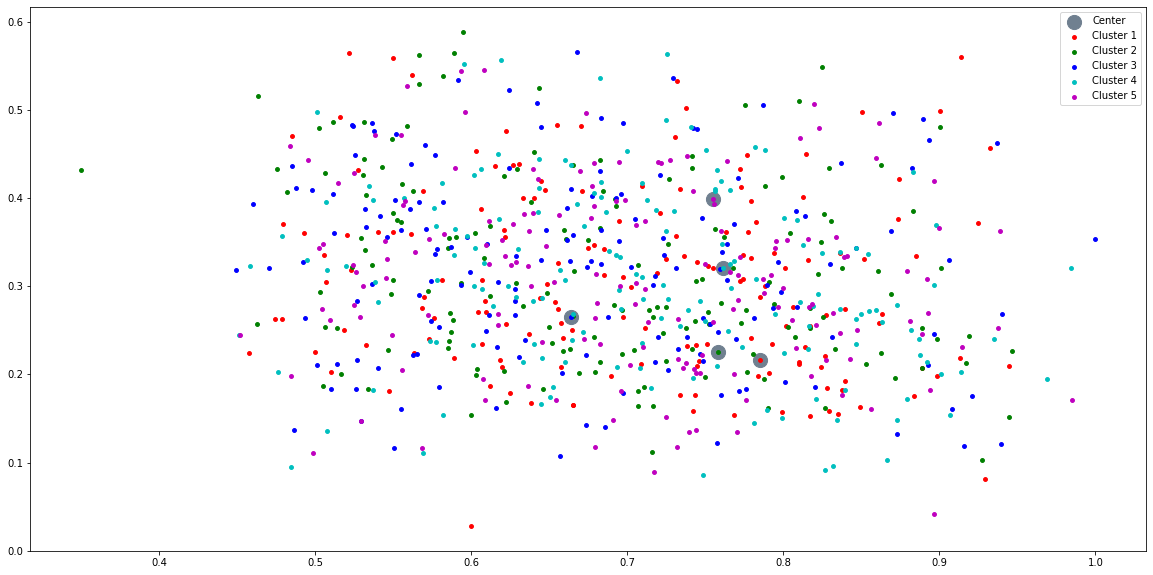

In [35]:
fig ,ax= plt.subplots(figsize=(20,10))
#ax = fig.add_subplot(projection='3d')
colors = ['r','g','b','c','m','y','k','tan','plum','slategrey']
labels = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9','Cluster 10']
ax.scatter(iCentroids[:,6], iCentroids[:,7], s=200, color='slategrey',label='Center')
for i in range(kmean):
    ax.scatter(iClusters[i][:,6], iClusters[i][:,7], s=15, color=colors[i], label=labels[i])
ax.legend()

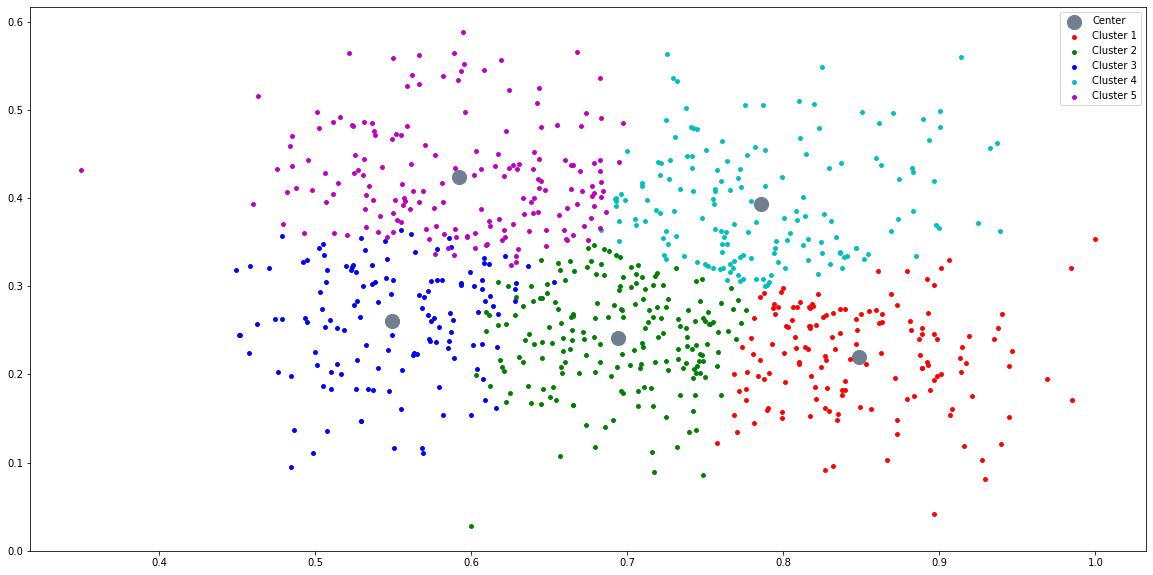

In [36]:
fig ,ax= plt.subplots(figsize=(20,10))
#ax = fig.add_subplot(projection='3d')
colors = ['r','g','b','c','m','y','k','tan','plum','slategrey']
labels = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9','Cluster 10',]

ax.scatter(final_centroids[:,6], final_centroids[:,7], s=200, color='slategrey',label='Center')
for i in range(kmean):
    ax.scatter(fClusters[i][:,6], fClusters[i][:,7], s=15, color=colors[i], label=labels[i])
ax.legend()

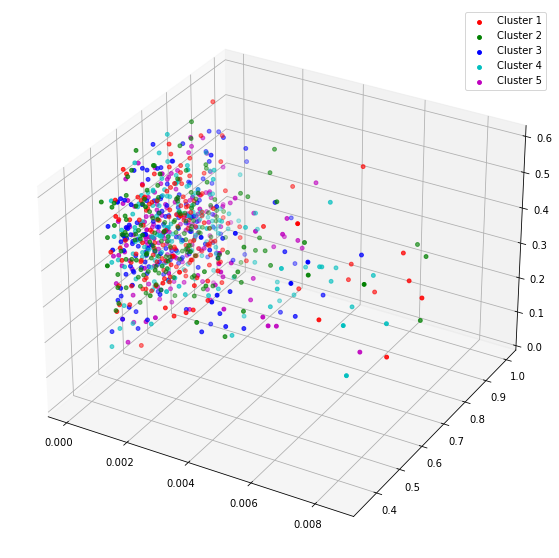

In [37]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
colors = ['r','g','b','c','m','y','k','tan','plum','slategrey']
labels = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9','Cluster 10',]
for i in range(kmean):
    ax.scatter(iClusters[i][:,2], iClusters[i][:,6],iClusters[i][:,7], s=15, color=colors[i], label=labels[i])
ax.legend()

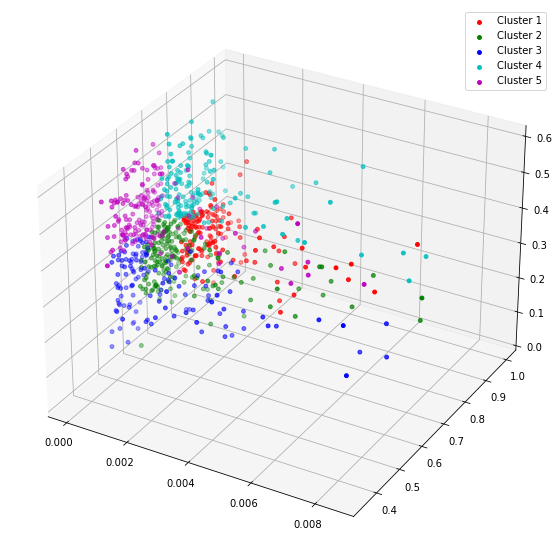

In [38]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
colors = ['r','g','b','c','m','y','k','tan','plum','slategrey']
labels = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9','Cluster 10',]
for i in range(kmean):
    ax.scatter(fClusters[i][:,2], fClusters[i][:,6],fClusters[i][:,7], s=15, color=colors[i], label=labels[i])
ax.legend()

# Davies-Bouldin Index

In [39]:
def scatter(centroids,clusters):
    #ASSUMING P = 2 HERE
    euc_dist = 0
    for i in range(len(clusters)):   #MEASURE VIA ONLY THE FEATURES SELECTED
                euc_dist += math.sqrt( #(pow(centroids[0]-(clusters[i][0]),2) ) + (pow(centroids[1]-(clusters[i][1]),2) ) \
                                #+ (pow(centroids[2] - (clusters[i][2]),2) ) + (pow(centroids[3]-(clusters[i][3]),2) ) \
                                #+ (pow(centroids[4]-(clusters[i][4]),2) ) + (pow(centroids[5]-(clusters[i][5]),2) ) \
                                (pow(centroids[6]-(clusters[i][6]),2) ) + (pow(centroids[7]-(clusters[i][7]),2) ) )
    euc_dist = float(euc_dist/len(clusters))
    return euc_dist

In [40]:
def measure_sep(centroids1,centroids2):
    #ASSUMING P = 2 HERE
    m = math.sqrt( (pow(centroids1[6]-(centroids2[6]),2) ) + (pow(centroids1[7]-(centroids2[7]),2) ) )
    return m

In [41]:
def findR(centroids1,centroids2,clusters1,clusters2):
    R = ( scatter(centroids1,clusters1) + scatter(centroids1,clusters1) ) / measure_sep(centroids1,centroids2)
    return R

In [42]:
def daviesBouldin(centroids,clusters):
    dbindex = 0
    for i in range(len(centroids)):
        maxvalue = -999999
        for j in range(len(centroids)):
            if i == j:
                continue
            R = findR(centroids[i],centroids[j],clusters[i],clusters[j])
            
            if R > maxvalue:
                maxvalue = R
        
        dbindex += maxvalue
        
    dbindex=float(dbindex/len(centroids))
    
    return dbindex

In [43]:
print("Davies Bouldin Index for K [",kmean,"] is = ",daviesBouldin(final_centroids,fClusters))

Davies Bouldin Index for K [ 5 ] is =  0.9229326517686829


In [44]:
print("Note: For 2 Features only And Values are somewhat different\nbecause less iterations are taken for less computation time and random points are taken\n")
i = 2
for k in range(6):
    clusterss,icentr = set_Initial_Clusters(i,messidor_data_out)
    messidor_np = messidor_data_out.to_numpy()
    idxx, fcentr = run_k_means(messidor_np, icentr, 250)
    fClust = []
    for j in range(i):
        fClust.append(messidor_np[np.where(idxx == j)[0],:])
    print("Davies Bouldin Index for K [",i,"] is = ",daviesBouldin(fcentr,fClust))
    i+=1

Note: For 2 Features only And Values are somewhat different
because less iterations are taken for less computation time and random points are taken

Davies Bouldin Index for K [ 2 ] is =  1.0308430581286718
Davies Bouldin Index for K [ 3 ] is =  0.9490719340965689
Davies Bouldin Index for K [ 4 ] is =  0.9227711190490653
Davies Bouldin Index for K [ 5 ] is =  0.9241947641017271
Davies Bouldin Index for K [ 6 ] is =  0.9577093730382175
Davies Bouldin Index for K [ 7 ] is =  0.9305420684682704
